# Multiclass classification model using TensorFlow

### Using VGG on CIFAR10 dataset

Data References: 
- Classes: https://www.cs.toronto.edu/~kriz/cifar.html

Code References: 
- [vgg16 documentation](https://pytorch.org/vision/main/models/generated/torchvision.models.vgg16.html)
- [Buiminhhien2k (2021)](https://medium.com/@buiminhhien2k/solving-cifar10-dataset-with-vgg16-pre-trained-architect-using-pytorch-validation-accuracy-over-3f9596942861)
- [Morillo (2020)](https://medium.com/analytics-vidhya/the-transfer-learning-experience-with-vgg16-and-cifar-10-dataset-9b25b306a23f)
- [rasbt/deeplearning-models on Github](https://github.com/rasbt/deeplearning-models/blob/master/pytorch_ipynb/transfer/transferlearning-vgg16-cifar10-1.ipynb)

### Mount the drive
To utilise GPU T4 on Google Colaboratory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# test
file_path = '/content/drive/MyDrive/data.txt'
data = 'Hello, World!'

with open(file_path, 'w') as file:
    file.write(data)

### Import libraries

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision import models

### Setup

In [ ]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Define hyperparameters
num_epochs = 5
batch_size = 40
learning_rate = 0.001
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Define the transforms for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

cpu


In [ ]:
# Load the CIFAR10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

n_total_step = len(train_loader)
print(n_total_step)

100%|██████████| 170498071/170498071 [00:02<00:00, 77334110.78it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
1250


In [ ]:
# Load pre-trained VGG16 model
model = models.vgg16(pretrained=True)

# Modify the last fully connected layer for the CIFAR10 dataset
input_lastLayer = model.classifier[6].in_features
model.classifier[6] = nn.Linear(input_lastLayer, 10)

# Move the model to the device
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 111MB/s] 


In [ ]:
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for i, (imgs, labels) in enumerate(train_loader):
        imgs = imgs.to(device)
        labels = labels.to(device)  # Move labels to the device

        labels_hat = model(imgs)
        n_corrects = (labels_hat.argmax(dim=1) == labels).sum().item()
        loss_value = criterion(labels_hat, labels)

        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()

        running_loss += loss_value.item()
        running_corrects += n_corrects
        total_samples += labels.size(0)

        if (i + 1) % 250 == 0:
            accuracy = 100 * (running_corrects / total_samples)
            print(f"Epoch {epoch+1}/{num_epochs}, Step: {i+1}/{n_total_step}, Loss: {running_loss:.5f}, Acc: {accuracy:.2f}%")
            running_loss = 0.0

    # Calculate accuracy at the end of each epoch
    epoch_accuracy = 100 * (running_corrects / total_samples)
    print(f"Epoch {epoch+1}/{num_epochs} completed. Accuracy: {epoch_accuracy:.2f}%")
    print()

Epoch 1/5, Step: 250/1250, Loss: 197.22289, Acc: 72.61%
Epoch 1/5, Step: 500/1250, Loss: 113.27337, Acc: 78.56%
Epoch 1/5, Step: 750/1250, Loss: 93.92229, Acc: 81.50%
Epoch 1/5, Step: 1000/1250, Loss: 84.44939, Acc: 83.24%
Epoch 1/5, Step: 1250/1250, Loss: 81.37593, Acc: 84.34%
Epoch 1/5 completed. Accuracy: 84.34%

Epoch 2/5, Step: 250/1250, Loss: 58.29408, Acc: 92.16%
Epoch 2/5, Step: 500/1250, Loss: 57.95814, Acc: 91.94%
Epoch 2/5, Step: 750/1250, Loss: 56.95491, Acc: 91.98%
Epoch 2/5, Step: 1000/1250, Loss: 55.21228, Acc: 92.07%
Epoch 2/5, Step: 1250/1250, Loss: 49.93966, Acc: 92.26%
Epoch 2/5 completed. Accuracy: 92.26%

Epoch 3/5, Step: 250/1250, Loss: 37.49269, Acc: 94.67%
Epoch 3/5, Step: 500/1250, Loss: 36.25033, Acc: 94.74%
Epoch 3/5, Step: 750/1250, Loss: 37.82670, Acc: 94.77%
Epoch 3/5, Step: 1000/1250, Loss: 37.00507, Acc: 94.81%
Epoch 3/5, Step: 1250/1250, Loss: 38.02019, Acc: 94.82%
Epoch 3/5 completed. Accuracy: 94.82%

Epoch 4/5, Step: 250/1250, Loss: 23.30403, Acc: 96

In [ ]:
# Compute overall accuracy
with torch.no_grad():
    number_corrects = 0
    number_samples = 0
    for i, (test_images_set, test_labels_set) in enumerate(test_loader):
        test_images_set = test_images_set.to(device)
        test_labels_set = test_labels_set.to(device)

        y_predicted = model(test_images_set)
        labels_predicted = y_predicted.argmax(dim=1)
        number_corrects += (labels_predicted == test_labels_set).sum().item()
        number_samples += test_labels_set.size(0)
    print(f"Overall accuracy: {(number_corrects / number_samples) * 100}%")

Overall accuracy: 92.56%


In [ ]:
# Save the trained model weights on Google Colab:
file_path = '/content/drive/MyDrive/cifar10_model.pth'
model_state_dict = model.state_dict()

torch.save(model_state_dict, file_path)

### Model Testing

In [ ]:
# check
# Load pre-trained model weights
model.load_state_dict(torch.load(file_path, map_location=torch.device('cpu')))
model.eval()

# Evaluation
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the model on the test images: {100 * correct / total:.2f}%")

Accuracy of the model on the test images: 93.36%


In [ ]:
# Retrieve a batch of images and their corresponding targets from the test loader
for batch_idx, (features, targets) in enumerate(test_loader):
    features = features.to(device)
    targets = targets.to(device)
    break

# Pass the images through the trained model to obtain the predicted labels
logits = model(features)
_, predicted_labels = torch.max(logits, 1)

def unnormalize(tensor, mean, std):
    # Reverse the normalization transformation applied to the images during training
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

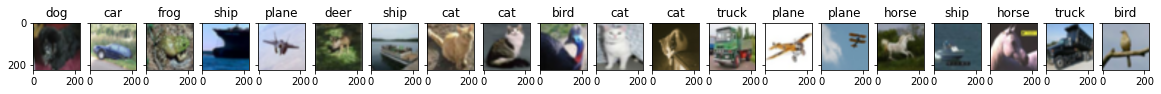

In [ ]:
n_images = 20

# Create a subplot grid to display the images
fig, axes = plt.subplots(nrows=1, ncols=n_images, sharex=True, sharey=True, figsize=(20, 2.5))
orig_images = features[:n_images].cpu()

for i in range(n_images):
    curr_img = orig_images[i]
    # Unnormalize and permute the image tensor for visualization
    curr_img = unnormalize(curr_img,
                           torch.tensor([0.5, 0.5, 0.5]),
                           torch.tensor([0.5, 0.5, 0.5])) 
    curr_img = curr_img.permute((1, 2, 0))
    axes[i].imshow(curr_img)
    axes[i].set_title(classes[predicted_labels[i].item()])  # Set the predicted label as the title

plt.show()